<a href="https://colab.research.google.com/github/EA17-ai/DLProjects/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv("Telco-Customer-Churn.csv")

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.drop("customerID",axis="columns",inplace=True)

In [ ]:
df=df[df["TotalCharges"]!=' ']

In [ ]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
for column in df:
  print( f"{column} :{df[column].unique()}"     )

gender :['Female' 'Male']
SeniorCitizen :[0 1]
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges 

In [ ]:
df.replace("No internet service","No",inplace=True)
df.replace("No phone service","No",inplace=True)


In [ ]:
for column in df:
  print( f"{column} :{df[column].unique()}"     )

gender :['Female' 'Male']
SeniorCitizen :[0 1]
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :['No' 'Yes']
MultipleLines :['No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes']
OnlineBackup :['Yes' 'No']
DeviceProtection :['No' 'Yes']
TechSupport :['No' 'Yes']
StreamingTV :['No' 'Yes']
StreamingMovies :['No' 'Yes']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :['No' 'Yes']


In [ ]:
yes_no_col=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup",
            "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]
for col in yes_no_col:
  df[col].replace({"Yes":1,"No":0},inplace=True)

In [ ]:
for column in df:
  print( f"{column} :{df[column].unique()}"     )

gender :['Female' 'Male']
SeniorCitizen :[0 1]
Partner :[1 0]
Dependents :[0 1]
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :[0 1]
MultipleLines :[0 1]
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :[0 1]
OnlineBackup :[1 0]
DeviceProtection :[0 1]
TechSupport :[0 1]
StreamingTV :[0 1]
StreamingMovies :[0 1]
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :[1 0]
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :[0 1]


In [ ]:
df["gender"].replace({"Female":0,"Male":1},inplace=True)

In [ ]:
for column in df:
  print( f"{column} :{df[column].unique()}"     )

gender :[0 1]
SeniorCitizen :[0 1]
Partner :[1 0]
Dependents :[0 1]
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :[0 1]
MultipleLines :[0 1]
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :[0 1]
OnlineBackup :[1 0]
DeviceProtection :[0 1]
TechSupport :[0 1]
StreamingTV :[0 1]
StreamingMovies :[0 1]
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :[1 0]
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :[0 1]


In [ ]:
#One Hot Encoding
df=pd.get_dummies(data=df,columns=["InternetService","Contract","PaymentMethod"])

In [ ]:
df.shape

(7032, 27)

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
#Scale the columns using MinMaxScaler
col_to_scale=["tenure","MonthlyCharges","TotalCharges" ]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[col_to_scale]=scaler.fit_transform(df[col_to_scale])

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
X=df.drop("Churn",axis="columns")
y=df["Churn"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
        keras.layers.Dense(20,input_shape=(26,),activation="relu"),
        keras.layers.Dense(15,activation="relu"),
        keras.layers.Dense(10,activation="relu"),
        
        keras.layers.Dense(1,activation="sigmoid")
                        ])

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 0.5565 - accuracy: 0.7020
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.7908
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.7984
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.8005
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.8016
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8044
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8071
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8034
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8084
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8084

In [ ]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7811


[0.45525050163269043, 0.7810945510864258]

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([[3.5431981e-04],
       [7.9045171e-01],
       [1.1012620e-01],
       ...,
       [1.0774815e-01],
       [1.4223653e-01],
       [1.9487125e-01]], dtype=float32)

In [ ]:
y_predict=[]
for element in y_pred:
  if element>0.5:
    y_predict.append(1)
  else:
    y_predict.append(0)  

Text(33.0, 0.5, 'Truth')

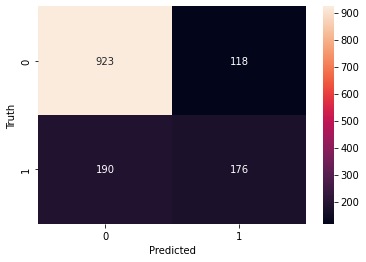

In [ ]:
cm=tf.math.confusion_matrix(y_test,y_predict)
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure()
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")